In [1]:
import fastf1
session = fastf1.get_session(2023, 'Australian Grand Prix', 'Race')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\Gattupalli Saketh\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 

In [3]:
import fastf1
session = fastf1.get_session(2021, 7, 'Q')
session.name



'Qualifying'

In [4]:
session = fastf1.get_session(2025, 'Silverstone', 'Race')
session.event['EventName']

'British Grand Prix'

In [ ]:
fastf1.set_log_level('WARNING')  # Reduce verbosity
fastf1.Cache.clear_cache()  # Clear cache if needed
fastf1.Cache.enable_cache('cache')  # Enable cache in 'cache' directory

In [7]:
standings = []
# Shorten the event names by trimming Grand Prix from the name.
# This will be used to label our graph.
short_event_names = []

for _, event in schedule.iterrows():
    event_name, round_number = event["EventName"], event["RoundNumber"]
    short_event_names.append(event_name.replace("Grand Prix", "").strip())

    # Only need to load the results data
    race = ff1.get_session(season, event_name, "R")
    race.load(laps=False, telemetry=False, weather=False, messages=False)

    # Add sprint race points if applicable
    sprint = None
    # F1 has used different names for the sprint race event format
    # From 2024 onwards, it has been "sprint_qualifying"
    # In 2023, you should match on "sprint_shootout"
    # In 2022 and 2021, you should match on "sprint"
    if event["EventFormat"] == "sprint_qualifying":
        sprint = ff1.get_session(season, event_name, "S")
        sprint.load(laps=False, telemetry=False, weather=False, messages=False)

    for _, driver_row in race.results.iterrows():
        abbreviation, race_points, race_position = (
            driver_row["Abbreviation"],
            driver_row["Points"],
            driver_row["Position"],
        )

        sprint_points = 0
        if sprint is not None:
            driver_row = sprint.results[
                sprint.results["Abbreviation"] == abbreviation
            ]
            if not driver_row.empty:
                # We need the values[0] accessor because driver_row is actually
                # returned as a dataframe with a single row
                sprint_points = driver_row["Points"].values[0]

        standings.append(
            {
                "EventName": event_name,
                "RoundNumber": round_number,
                "Driver": abbreviation,
                "Points": race_points + sprint_points,
                "Position": race_position,
            }
        )

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO

In [ ]:
df = pd.DataFrame(standings)


In [12]:
df.head(20)

,EventName,RoundNumber,Driver,Points,Position
0,Bahrain Grand Prix,1,VER,26.0,1.0
1,Bahrain Grand Prix,1,PER,18.0,2.0
2,Bahrain Grand Prix,1,SAI,15.0,3.0
3,Bahrain Grand Prix,1,LEC,12.0,4.0
4,Bahrain Grand Prix,1,RUS,10.0,5.0
5,Bahrain Grand Prix,1,NOR,8.0,6.0
6,Bahrain Grand Prix,1,HAM,6.0,7.0
7,Bahrain Grand Prix,1,PIA,4.0,8.0
8,Bahrain Grand Prix,1,ALO,2.0,9.0
9,Bahrain Grand Prix,1,STR,1.0,10.0


In [ ]:
df.to_csv("f1_standings_2024.csv", index=False)

In [1]:
import pandas as pd
import fastf1 as ff1

seasons = [2022, 2023, 2024]
standings = []
short_event_names = []

for season in seasons:
    schedule = ff1.get_event_schedule(season, include_testing=False)
    for _, event in schedule.iterrows():
        event_name, round_number = event["EventName"], event["RoundNumber"]
        short_event_names.append(event_name.replace("Grand Prix", "").strip())
        
        race = ff1.get_session(season, event_name, "R")
        race.load(laps=False, telemetry=False, weather=False, messages=False)

        # Choose sprint event format by year
        event_format = event["EventFormat"]
        sprint = None
        if (season >= 2024 and event_format == "sprint_qualifying") or \
           (season == 2023 and event_format == "sprint_shootout") or \
           (season in [2021, 2022] and event_format == "sprint"):
            sprint = ff1.get_session(season, event_name, "S")
            sprint.load(laps=False, telemetry=False, weather=False, messages=False)
        
        for _, driver_row in race.results.iterrows():
            abbreviation, race_points, race_position = (
                driver_row["Abbreviation"],
                driver_row["Points"],
                driver_row["Position"],
            )

            sprint_points = 0
            if sprint is not None:
                sprint_row = sprint.results[sprint.results["Abbreviation"] == abbreviation]
                if not sprint_row.empty:
                    sprint_points = sprint_row["Points"].values[0]
            
            standings.append({
                "Season": season,
                "EventName": event_name,
                "RoundNumber": round_number,
                "Driver": abbreviation,
                "Points": race_points + sprint_points,
                "Position": race_position,
            })


req         WARNING 	DEFAULT CACHE ENABLED! (141.91 MB) C:\Users\Gattupalli Saketh\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached

In [2]:
df=pd.DataFrame(standings)

In [3]:
df.head(30)

,Season,EventName,RoundNumber,Driver,Points,Position
0,2022,Bahrain Grand Prix,1,LEC,26.0,1.0
1,2022,Bahrain Grand Prix,1,SAI,18.0,2.0
2,2022,Bahrain Grand Prix,1,HAM,15.0,3.0
3,2022,Bahrain Grand Prix,1,RUS,12.0,4.0
4,2022,Bahrain Grand Prix,1,MAG,10.0,5.0
5,2022,Bahrain Grand Prix,1,BOT,8.0,6.0
6,2022,Bahrain Grand Prix,1,OCO,6.0,7.0
7,2022,Bahrain Grand Prix,1,TSU,4.0,8.0
8,2022,Bahrain Grand Prix,1,ALO,2.0,9.0
9,2022,Bahrain Grand Prix,1,ZHO,1.0,10.0


In [4]:
df.to_csv("f1_standings_2022_2024.csv", index=False)

## Machine Learning Model 

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report

In [9]:
data =pd.read_csv("f1_standings_2022_2024.csv")
data = data.dropna(subset=['Position']) #Droping unfineshed races
data['Position'] = data['Position'].astype(int) - 1 #Changing the type of data element to integer 

# Feature Engineering
for col in ['EventName', 'Driver']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

#Features and Target
X = data.drop(columns = ["Position"])
y = data['Position'] 

#Splitting the data into traing and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = len(y_train.unique())

#Model Training
model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

#Make predictions
y_predict = model.predict(X_test)

#Evaluation
print(classification_report(y_test,y_predict,zero_division=0))

c:\Users\Gattupalli Saketh\OneDrive\Desktop\F1 Project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:32:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.68      0.72      0.70        18
           2       0.71      0.77      0.74        13
           3       0.75      0.75      0.75        12
           4       0.93      0.93      0.93        14
           5       0.87      1.00      0.93        13
           6       0.93      0.76      0.84        17
           7       0.62      1.00      0.76         8
           8       0.92      0.80      0.86        15
           9       0.93      1.00      0.97        14
          10       0.08      0.08      0.08        13
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        19
          13       0.08      0.11      0.09         9
          14       0.00      0.00      0.00        15
          15       0.25      0.18      0.21        11
          16       0.00      0.00      0.00        13
          17       0.09    

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assume these are your trained LabelEncoders from model training time
# For example, you saved them or still have them as variables:
eventname_le = LabelEncoder()
driver_le = LabelEncoder()

# You must fit them on the original full dataset's categorical columns again 
# (or load them if saved). Example:
# data = pd.read_csv("f1_standings_2022_2024.csv")
# eventname_le.fit(data['EventName'])
# driver_le.fit(data['Driver'])

# For this example, let's assume you have 'data' loaded already:
data = pd.read_csv("f1_standings_2022_2024.csv")
data = data.dropna(subset=['Position'])
data['Position'] = data['Position'].astype(int) - 1

# Fit encoders on the data (you should ideally save these during model training)
eventname_le.fit(data['EventName'])
driver_le.fit(data['Driver'])

# Encode 'EventName' and 'Driver' in the data as done for training
data['EventName_enc'] = eventname_le.transform(data['EventName'])
data['Driver_enc'] = driver_le.transform(data['Driver'])

# Define the Italian Grand Prix event name and corresponding round number for the prediction
italian_gp_name = "Italian Grand Prix"

# Encode the Italian Grand Prix event name
try:
    italian_gp_encoded = eventname_le.transform([italian_gp_name])[0]
except ValueError:
    raise ValueError(f"'{italian_gp_name}' not found in the EventName LabelEncoder classes.")

# Get the RoundNumber for Italian Grand Prix from your dataset
# (You can hardcode if you know it, or get it from the data if consistent)
round_number_italian_gp = data.loc[data['EventName'] == italian_gp_name, 'RoundNumber'].iloc[0]

# List all drivers (encoded) from your dataset to build prediction input
drivers = driver_le.classes_  # original driver names
drivers_encoded = driver_le.transform(drivers)

# Create prediction input DataFrame for the Italian GP
monza_data = pd.DataFrame({
    'Season': [2024] * len(drivers),  # or whichever season you want to predict
    'EventName': [italian_gp_encoded] * len(drivers),
    'RoundNumber': [round_number_italian_gp] * len(drivers),
    'Driver': drivers_encoded,
    'Points': [0]*len(drivers)  # set to 0 if points unknown ahead of race
})

# Drop or keep other features as required by your trained model (match training features exactly)
X_predict = monza_data  # assuming your model used these features as is

# Predict positions using your trained model
predicted_positions = model.predict(X_predict)

# Find the predicted winner (position 0 corresponds to finishing 1st)
winner_index = np.argmin(predicted_positions)
predicted_winner_encoded = monza_data.iloc[winner_index]['Driver']
predicted_winner_name = driver_le.inverse_transform([predicted_winner_encoded])[0]

print(f"Predicted winner for the Italian Grand Prix: {predicted_winner_name}")


Predicted winner for the Italian Grand Prix: ALB


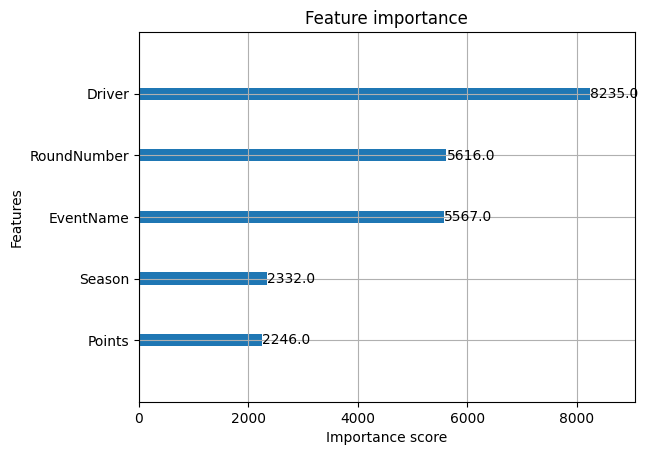

In [12]:
import xgboost as xgb
import matplotlib.pyplot as plt

# assuming 'model' is your trained XGBoost model
xgb.plot_importance(model)
plt.show()
